In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [285]:
store = pd.read_csv('store.csv')
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

C:\Users\Pravin\AppData\Local\Temp\ipykernel_4008\3999882305.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('train.csv')


In [286]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [287]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [288]:
store.isna().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [289]:
store.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [290]:
store.StoreType.value_counts()

a    602
d    348
c    148
b     17
Name: StoreType, dtype: int64

In [291]:
store.Assortment.value_counts()

a    593
c    513
b      9
Name: Assortment, dtype: int64

In [292]:
store.PromoInterval.value_counts()

Jan,Apr,Jul,Oct     335
Feb,May,Aug,Nov     130
Mar,Jun,Sept,Dec    106
Name: PromoInterval, dtype: int64

In [293]:
cols=store.columns
cols

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [294]:
store['CompetitionDistance'].fillna(store['CompetitionDistance'].median(), inplace = True)
store['CompetitionOpenSinceMonth'].fillna(store['CompetitionOpenSinceMonth'].median(), inplace = True)
store['CompetitionOpenSinceYear'].fillna(store['CompetitionOpenSinceYear'].median(), inplace = True)
store['PromoInterval'].fillna('NA', inplace = True)

In [295]:
store.isna().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            0
CompetitionOpenSinceMonth      0
CompetitionOpenSinceYear       0
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                  0
dtype: int64

In [296]:
store.fillna(0,inplace=True)

In [297]:
store.isna().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [298]:
store.PromoInterval.value_counts()

NA                  544
Jan,Apr,Jul,Oct     335
Feb,May,Aug,Nov     130
Mar,Jun,Sept,Dec    106
Name: PromoInterval, dtype: int64

In [299]:
store.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000
mean,558.00000,5396.614350,7.470852,2009.091480,0.512108,12.083408,1030.239462
std,322.01708,7654.513635,2.677756,5.155105,0.500078,15.542241,1006.038782
min,1.00000,20.000000,1.000000,1900.000000,0.000000,0.000000,0.000000
25%,279.50000,720.000000,6.000000,2008.000000,0.000000,0.000000,0.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,1.000000,2009.000000
75%,836.50000,6875.000000,9.000000,2011.000000,1.000000,22.000000,2012.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [300]:
train.head(-5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017199,1106,2,2013-01-01,0,0,0,0,a,1
1017200,1107,2,2013-01-01,0,0,0,0,a,1
1017201,1108,2,2013-01-01,0,0,0,0,a,1
1017202,1109,2,2013-01-01,0,0,0,0,a,1


In [301]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [390]:
test.head(-5)

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0
...,...,...,...,...,...,...,...,...
41078,41079,1104,6,2015-08-01,1.0,0,0,0
41079,41080,1105,6,2015-08-01,1.0,0,0,0
41080,41081,1106,6,2015-08-01,1.0,0,0,0
41081,41082,1107,6,2015-08-01,1.0,0,0,0


In [303]:
test.Date.unique()

array(['2015-09-17', '2015-09-16', '2015-09-15', '2015-09-14',
       '2015-09-13', '2015-09-12', '2015-09-11', '2015-09-10',
       '2015-09-09', '2015-09-08', '2015-09-07', '2015-09-06',
       '2015-09-05', '2015-09-04', '2015-09-03', '2015-09-02',
       '2015-09-01', '2015-08-31', '2015-08-30', '2015-08-29',
       '2015-08-28', '2015-08-27', '2015-08-26', '2015-08-25',
       '2015-08-24', '2015-08-23', '2015-08-22', '2015-08-21',
       '2015-08-20', '2015-08-19', '2015-08-18', '2015-08-17',
       '2015-08-16', '2015-08-15', '2015-08-14', '2015-08-13',
       '2015-08-12', '2015-08-11', '2015-08-10', '2015-08-09',
       '2015-08-08', '2015-08-07', '2015-08-06', '2015-08-05',
       '2015-08-04', '2015-08-03', '2015-08-02', '2015-08-01'],
      dtype=object)

In [304]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             41088 non-null  int64  
 1   Store          41088 non-null  int64  
 2   DayOfWeek      41088 non-null  int64  
 3   Date           41088 non-null  object 
 4   Open           41077 non-null  float64
 5   Promo          41088 non-null  int64  
 6   StateHoliday   41088 non-null  object 
 7   SchoolHoliday  41088 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 2.5+ MB


In [305]:
train_data = train.merge(store,on='Store',copy=False)
train_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,NA
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,NA
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,NA
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,NA
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,NA


<Axes: >

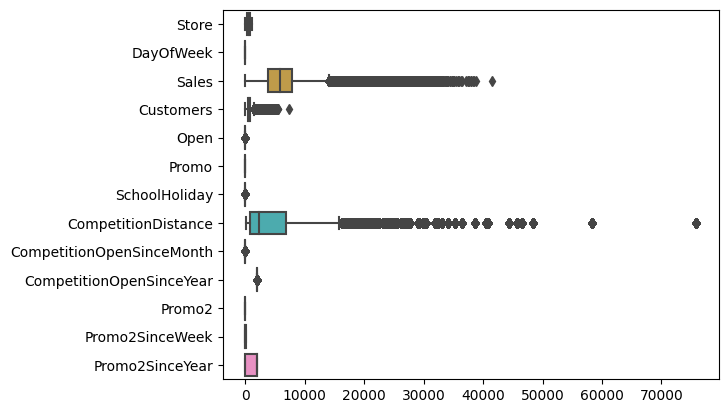

In [306]:
sns.boxplot(train_data,orient='h')

In [307]:
train_data['Date'] = pd.to_datetime(train_data['Date'])
train_data['year'] = train_data['Date'].dt.year
train_data['month'] = train_data['Date'].dt.month

In [308]:
train_data['Week'] = train_data.Date.apply(lambda x: x.weekofyear)

In [309]:
train_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,year,month,Week
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,1270.0,9.0,2008.0,0,0.0,0.0,NA,2015,7,31
1,1,4,2015-07-30,5020,546,1,1,0,1,c,...,1270.0,9.0,2008.0,0,0.0,0.0,NA,2015,7,31
2,1,3,2015-07-29,4782,523,1,1,0,1,c,...,1270.0,9.0,2008.0,0,0.0,0.0,NA,2015,7,31
3,1,2,2015-07-28,5011,560,1,1,0,1,c,...,1270.0,9.0,2008.0,0,0.0,0.0,NA,2015,7,31
4,1,1,2015-07-27,6102,612,1,1,0,1,c,...,1270.0,9.0,2008.0,0,0.0,0.0,NA,2015,7,31


In [310]:
train_data.drop(['Date'], axis = 1, inplace= True)

In [311]:
train_data['CompetitionOpenSince'] = 12 * (train_data.year - train_data.CompetitionOpenSinceYear) + (train_data.month - train_data.CompetitionOpenSinceMonth)

In [312]:
train_data.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,year,month,Week,CompetitionOpenSince
0,1,5,5263,555,1,1,0,1,c,a,...,9.0,2008.0,0,0.0,0.0,NA,2015,7,31,82.0
1,1,4,5020,546,1,1,0,1,c,a,...,9.0,2008.0,0,0.0,0.0,NA,2015,7,31,82.0
2,1,3,4782,523,1,1,0,1,c,a,...,9.0,2008.0,0,0.0,0.0,NA,2015,7,31,82.0
3,1,2,5011,560,1,1,0,1,c,a,...,9.0,2008.0,0,0.0,0.0,NA,2015,7,31,82.0
4,1,1,6102,612,1,1,0,1,c,a,...,9.0,2008.0,0,0.0,0.0,NA,2015,7,31,82.0


In [313]:
train_data.drop(['CompetitionOpenSinceMonth'], axis = 1, inplace= True)
train_data.drop(['CompetitionOpenSinceYear'], axis = 1, inplace= True)

In [314]:
train_data.head(-5)

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,year,month,Week,CompetitionOpenSince
0,1,5,5263,555,1,1,0,1,c,a,1270.0,0,0.0,0.0,NA,2015,7,31,82.0
1,1,4,5020,546,1,1,0,1,c,a,1270.0,0,0.0,0.0,NA,2015,7,31,82.0
2,1,3,4782,523,1,1,0,1,c,a,1270.0,0,0.0,0.0,NA,2015,7,31,82.0
3,1,2,5011,560,1,1,0,1,c,a,1270.0,0,0.0,0.0,NA,2015,7,31,82.0
4,1,1,6102,612,1,1,0,1,c,a,1270.0,0,0.0,0.0,NA,2015,7,31,82.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017199,1115,4,5007,339,1,1,0,1,d,c,5350.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",2013,1,2,29.0
1017200,1115,3,4649,324,1,1,0,1,d,c,5350.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",2013,1,2,29.0
1017201,1115,2,5243,341,1,1,0,1,d,c,5350.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",2013,1,2,29.0
1017202,1115,1,6905,471,1,1,0,1,d,c,5350.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",2013,1,2,29.0


In [315]:
train_data['Promo2Since'] = np.where((train_data['Promo2SinceWeek']==0) & 
                                                  (train_data['Promo2SinceYear']==0) , 0,
                                                  (train_data.Week - train_data.Promo2SinceWeek)/4 
                                                  + (12 * (train_data.year - train_data.Promo2SinceYear)) )

In [316]:
train_data.head(-5)

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,year,month,Week,CompetitionOpenSince,Promo2Since
0,1,5,5263,555,1,1,0,1,c,a,1270.0,0,0.0,0.0,NA,2015,7,31,82.0,0.00
1,1,4,5020,546,1,1,0,1,c,a,1270.0,0,0.0,0.0,NA,2015,7,31,82.0,0.00
2,1,3,4782,523,1,1,0,1,c,a,1270.0,0,0.0,0.0,NA,2015,7,31,82.0,0.00
3,1,2,5011,560,1,1,0,1,c,a,1270.0,0,0.0,0.0,NA,2015,7,31,82.0,0.00
4,1,1,6102,612,1,1,0,1,c,a,1270.0,0,0.0,0.0,NA,2015,7,31,82.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017199,1115,4,5007,339,1,1,0,1,d,c,5350.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",2013,1,2,29.0,7.00
1017200,1115,3,4649,324,1,1,0,1,d,c,5350.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",2013,1,2,29.0,7.00
1017201,1115,2,5243,341,1,1,0,1,d,c,5350.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",2013,1,2,29.0,7.00
1017202,1115,1,6905,471,1,1,0,1,d,c,5350.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",2013,1,2,29.0,7.00


In [317]:
train_data.drop(['Promo2SinceWeek'], axis = 1, inplace= True)
train_data.drop(['Promo2SinceYear'], axis = 1, inplace= True)

In [318]:
train_data.head(-5)

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,PromoInterval,year,month,Week,CompetitionOpenSince,Promo2Since
0,1,5,5263,555,1,1,0,1,c,a,1270.0,0,NA,2015,7,31,82.0,0.00
1,1,4,5020,546,1,1,0,1,c,a,1270.0,0,NA,2015,7,31,82.0,0.00
2,1,3,4782,523,1,1,0,1,c,a,1270.0,0,NA,2015,7,31,82.0,0.00
3,1,2,5011,560,1,1,0,1,c,a,1270.0,0,NA,2015,7,31,82.0,0.00
4,1,1,6102,612,1,1,0,1,c,a,1270.0,0,NA,2015,7,31,82.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017199,1115,4,5007,339,1,1,0,1,d,c,5350.0,1,"Mar,Jun,Sept,Dec",2013,1,2,29.0,7.00
1017200,1115,3,4649,324,1,1,0,1,d,c,5350.0,1,"Mar,Jun,Sept,Dec",2013,1,2,29.0,7.00
1017201,1115,2,5243,341,1,1,0,1,d,c,5350.0,1,"Mar,Jun,Sept,Dec",2013,1,2,29.0,7.00
1017202,1115,1,6905,471,1,1,0,1,d,c,5350.0,1,"Mar,Jun,Sept,Dec",2013,1,2,29.0,7.00


In [319]:
train_data.columns

Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'Promo2', 'PromoInterval', 'year', 'month',
       'Week', 'CompetitionOpenSince', 'Promo2Since'],
      dtype='object')

In [320]:
train_data = train_data.loc[:,['Store', 'DayOfWeek', 'Week', 'month', 'year', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday',
 'StoreType', 'Assortment', 'CompetitionDistance', 'CompetitionOpenSince', 'Promo2', 'Promo2Since', 'PromoInterval']]

In [321]:
train_data.head()

,Store,DayOfWeek,Week,month,year,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSince,Promo2,Promo2Since,PromoInterval
0,1,5,31,7,2015,5263,555,1,1,0,1,c,a,1270.0,82.0,0,0.0,NA
1,1,4,31,7,2015,5020,546,1,1,0,1,c,a,1270.0,82.0,0,0.0,NA
2,1,3,31,7,2015,4782,523,1,1,0,1,c,a,1270.0,82.0,0,0.0,NA
3,1,2,31,7,2015,5011,560,1,1,0,1,c,a,1270.0,82.0,0,0.0,NA
4,1,1,31,7,2015,6102,612,1,1,0,1,c,a,1270.0,82.0,0,0.0,NA


<Axes: xlabel='Promo2Since', ylabel='Count'>

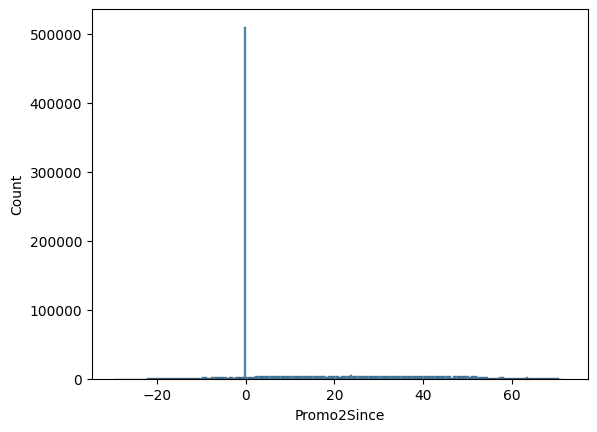

In [322]:
sns.histplot(train_data['Promo2Since'])

In [323]:
train_data.query('Promo2Since<0')

,Store,DayOfWeek,Week,month,year,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSince,Promo2,Promo2Since,PromoInterval
17926,20,1,27,6,2014,9229,954,1,1,0,0,d,a,2340.0,61.0,1,-3.25,"Jan,Apr,Jul,Oct"
17927,20,7,26,6,2014,0,0,0,0,0,0,d,a,2340.0,61.0,1,-3.50,"Jan,Apr,Jul,Oct"
17928,20,6,26,6,2014,5572,566,1,0,0,0,d,a,2340.0,61.0,1,-3.50,"Jan,Apr,Jul,Oct"
17929,20,5,26,6,2014,7149,839,1,0,0,0,d,a,2340.0,61.0,1,-3.50,"Jan,Apr,Jul,Oct"
17930,20,4,26,6,2014,8118,997,1,0,0,0,d,a,2340.0,61.0,1,-3.50,"Jan,Apr,Jul,Oct"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1013436,1111,6,1,1,2013,3325,291,1,0,0,0,a,a,1900.0,-17.0,1,-7.50,"Jan,Apr,Jul,Oct"
1013437,1111,5,1,1,2013,4640,453,1,0,0,1,a,a,1900.0,-17.0,1,-7.50,"Jan,Apr,Jul,Oct"
1013438,1111,4,1,1,2013,4579,444,1,0,0,1,a,a,1900.0,-17.0,1,-7.50,"Jan,Apr,Jul,Oct"
1013439,1111,3,1,1,2013,5097,505,1,0,0,1,a,a,1900.0,-17.0,1,-7.50,"Jan,Apr,Jul,Oct"


In [356]:
train_data['Promo2Since'] = np.where(train_data['Promo2Since']<0,0,train_data['Promo2Since'])

<Axes: xlabel='Promo2Since', ylabel='Count'>

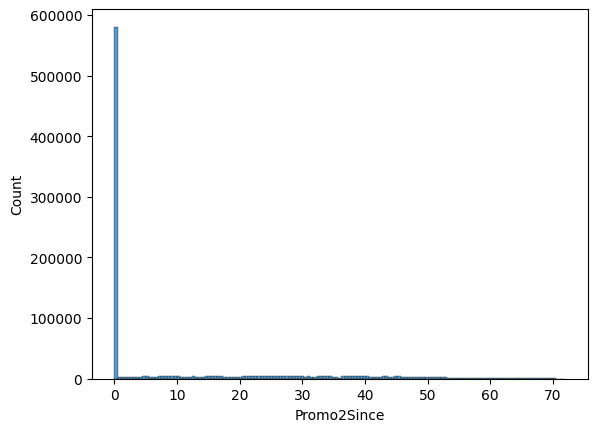

In [357]:
sns.histplot(train_data['Promo2Since'])

In [358]:
train_data.head()

,Store,DayOfWeek,Week,month,year,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSince,Promo2,Promo2Since,PromoInterval
0,1,5,31,7,2015,5263,555,1,1,0,1,c,a,1270.0,82.0,0,0.0,NA
1,1,4,31,7,2015,5020,546,1,1,0,1,c,a,1270.0,82.0,0,0.0,NA
2,1,3,31,7,2015,4782,523,1,1,0,1,c,a,1270.0,82.0,0,0.0,NA
3,1,2,31,7,2015,5011,560,1,1,0,1,c,a,1270.0,82.0,0,0.0,NA
4,1,1,31,7,2015,6102,612,1,1,0,1,c,a,1270.0,82.0,0,0.0,NA


In [359]:
df=train_data.copy()

In [361]:
cat_cols=[col for col in df.columns if df[col].dtype == 'O']
cat_cols

['StateHoliday', 'StoreType', 'Assortment', 'PromoInterval']

In [362]:
df.StateHoliday.unique()
df['StateHoliday'] = np.where(df['StateHoliday']=='0',0,df['StateHoliday'])

In [363]:
df.StateHoliday.unique()

array([0, 'a', 'b', 'c'], dtype=object)

In [364]:
df['StateHoliday'] = np.where(df['StateHoliday']==0,'0',df['StateHoliday'])
df.StateHoliday.unique()

array(['0', 'a', 'b', 'c'], dtype=object)

In [365]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [366]:
for col in cat_cols:
    df[col]=le.fit_transform(df[col])

In [367]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Store                 1017209 non-null  int64  
 1   DayOfWeek             1017209 non-null  int64  
 2   Week                  1017209 non-null  int64  
 3   month                 1017209 non-null  int64  
 4   year                  1017209 non-null  int64  
 5   Sales                 1017209 non-null  int64  
 6   Customers             1017209 non-null  int64  
 7   Open                  1017209 non-null  int64  
 8   Promo                 1017209 non-null  int64  
 9   StateHoliday          1017209 non-null  int32  
 10  SchoolHoliday         1017209 non-null  int64  
 11  StoreType             1017209 non-null  int32  
 12  Assortment            1017209 non-null  int32  
 13  CompetitionDistance   1017209 non-null  float64
 14  CompetitionOpenSince  1017209 non-

In [368]:
df.columns

Index(['Store', 'DayOfWeek', 'Week', 'month', 'year', 'Sales', 'Customers',
       'Open', 'Promo', 'StateHoliday', 'SchoolHoliday', 'StoreType',
       'Assortment', 'CompetitionDistance', 'CompetitionOpenSince', 'Promo2',
       'Promo2Since', 'PromoInterval'],
      dtype='object')

<Axes: >

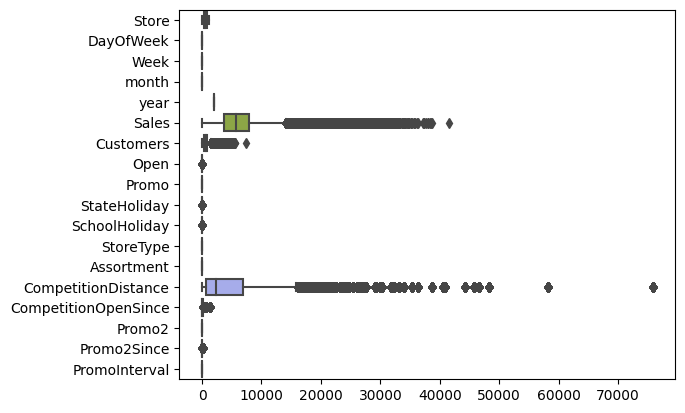

In [369]:
sns.boxplot(df,orient='h')

<Axes: >

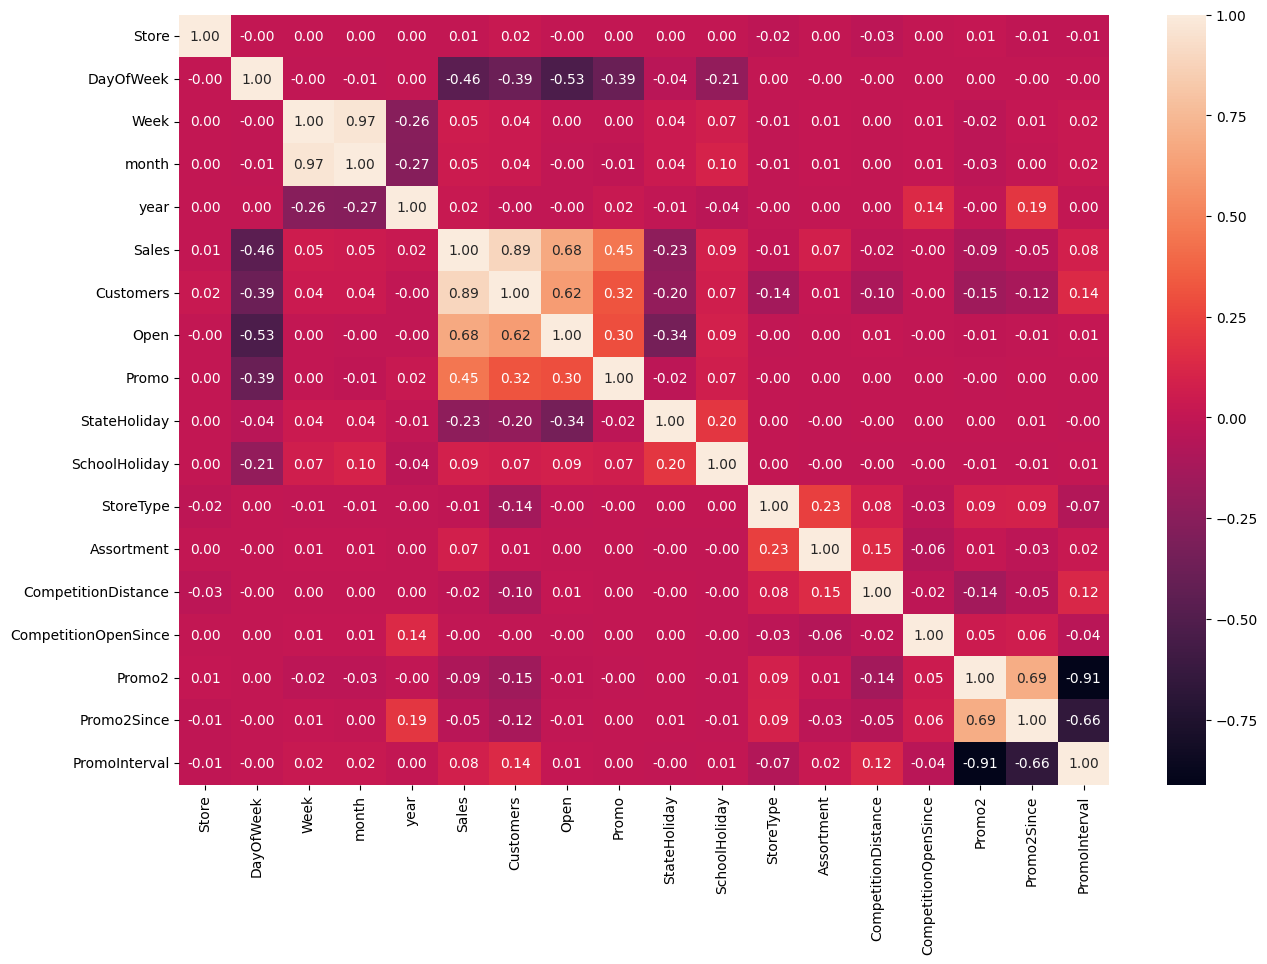

In [386]:
plt.subplots(figsize = (15, 10))
sns.heatmap(df.corr(),annot=True, fmt='.2f')

In [370]:
X=df.drop(['Sales','Customers'],axis=1)
X.head()

,Store,DayOfWeek,Week,month,year,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSince,Promo2,Promo2Since,PromoInterval
0,1,5,31,7,2015,1,1,0,1,2,0,1270.0,82.0,0,0.0,3
1,1,4,31,7,2015,1,1,0,1,2,0,1270.0,82.0,0,0.0,3
2,1,3,31,7,2015,1,1,0,1,2,0,1270.0,82.0,0,0.0,3
3,1,2,31,7,2015,1,1,0,1,2,0,1270.0,82.0,0,0.0,3
4,1,1,31,7,2015,1,1,0,1,2,0,1270.0,82.0,0,0.0,3


In [371]:
y=df.Sales
y.head()

0    5263
1    5020
2    4782
3    5011
4    6102
Name: Sales, dtype: int64

In [373]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=15)

In [374]:
X_train.shape

(712046, 16)

In [375]:
X_test.shape

(305163, 16)

In [376]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [377]:
from sklearn.preprocessing import StandardScaler
scaled = StandardScaler()

In [378]:
X_train = scaled.fit_transform(X_train)

In [379]:
X_test = scaled.transform(X_test)

In [380]:
reg.fit(X_train,y_train)

LinearRegression()

In [381]:
y_pred=reg.predict(X_test)

In [382]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.5514151828127472

In [387]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()

In [389]:
gbr.fit(X_train,y_train)

KeyboardInterrupt: 